In [ ]:
import scanpy as sc
import anndata as ad
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import median_abs_deviation
import numpy as np
import os
import re

In [2]:
# first taking a look at one sample for inspection
p1_dir = "PBMC_datasets/2/GSE141578_RAW/PBMC8_matrix/"

adata1 = sc.read_10x_mtx(
    p1_dir,
    var_names="gene_symbols",
    cache=True
)
adata1.var_names_make_unique()


In [3]:
print(adata1)
# no metadata, will have to add

AnnData object with n_obs × n_vars = 992 × 56395
    var: 'gene_ids'


In [4]:
display(adata1.obs.head())
display(adata1.var.head()) 
# dont have the enseble id (gene_ids is the same as the gene symbols)

""
406_CATAGGACTGTGCTCAGAAG-1
406_CTGATACTTCACATCATTGC-1
406_TGTAGCGTAACAGCGAAGTC-1
406_GTAGTACCGGATAACATACG-1
406_GCTGCTCTTCACCTCTCCTG-1


,gene_ids
AL669831.5,AL669831.5
LINC00115,LINC00115
NOC2L,NOC2L
KLHL17,KLHL17
PLEKHN1,PLEKHN1


In [5]:
pd.DataFrame(
    adata1.X[:10, :20].toarray(),
    index=adata1.obs_names[:10],
    columns=adata1.var_names[:20]
)
# already normalised?

,AL669831.5,LINC00115,NOC2L,KLHL17,PLEKHN1,ISG15,C1orf159,TNFRSF18,TNFRSF4,SDF4,B3GALT6,C1QTNF12,UBE2J2,SCNN1D,ACAP3,PUSL1,INTS11,CPTP,DVL1,AURKAIP1
406_CATAGGACTGTGCTCAGAAG-1,0.0,0.0,0.0,0.0,0.0,0.899366,0.000000,0.000000,0.937656,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.919132
406_CTGATACTTCACATCATTGC-1,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000
406_TGTAGCGTAACAGCGAAGTC-1,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.931457,0.0,0.0,0.000000,0.0,0.000000,0.0,0.928501,0.0,0.0,0.927658
406_GTAGTACCGGATAACATACG-1,0.0,0.0,0.0,0.0,0.0,0.915168,0.961162,0.000000,0.000000,0.948881,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000
406_GCTGCTCTTCACCTCTCCTG-1,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.944302,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000
406_CAAGAGGTCACCTTACCACA-1,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.956661,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000
406_ACATTCTTATCTCAAGTCGC-1,0.0,0.0,0.0,0.0,0.0,1.914330,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,1.946151,0.0,0.0,0.000000
406_ACGATGCGAATGGTATTGTC-1,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.944633,0.0,0.0,1.943980
406_TTACGGTTAAACCTCTCCTG-1,0.0,0.0,0.0,0.0,0.0,1.902740,0.000000,0.960706,2.968320,0.000000,0.0,0.0,0.938997,0.0,0.954230,0.0,1.938866,0.0,0.0,0.938145
406_TGCACTGTCTGTGTCACGAG-1,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.954587,0.0,0.000000,0.0,0.0,0.952765


In [6]:
# mitochondrial genes
adata1.var["mt"] = adata1.var_names.str.startswith("MT-") 
# ribosomal genes
adata1.var["ribo"] = adata1.var_names.str.startswith(("RPS", "RPL"))
# hemoglobin genes.
adata1.var["hb"] = adata1.var_names.str.contains("^HB[^(P)]")

sc.pp.calculate_qc_metrics(
    adata1, qc_vars=["mt", "ribo", "hb"], inplace=True, percent_top=[20], log1p=True
)
adata1

AnnData object with n_obs × n_vars = 992 × 56395
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb'
    var: 'gene_ids', 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'

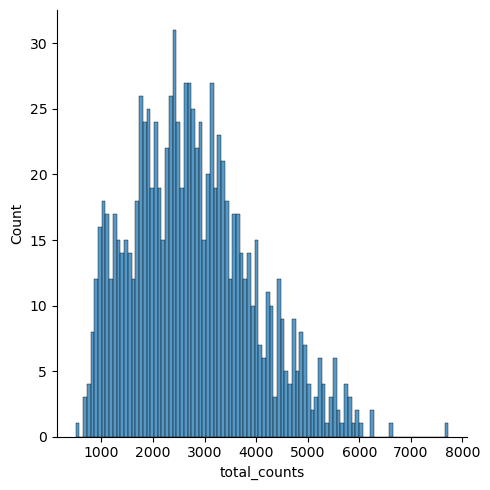

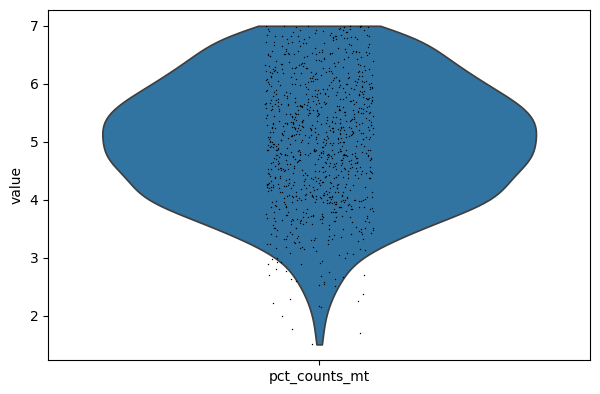

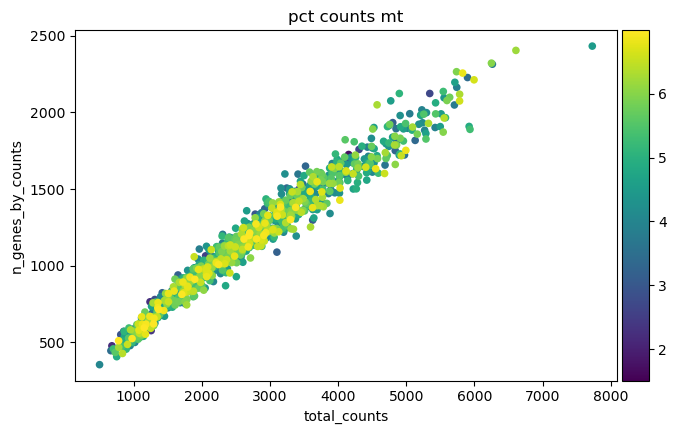

In [7]:
p1 = sns.displot(adata1.obs["total_counts"], bins=100, kde=False)
p2 = sc.pl.violin(adata1, "pct_counts_mt")
p3 = sc.pl.scatter(adata1, "total_counts", "n_genes_by_counts", color="pct_counts_mt")

In [8]:
print(adata1.X.max())
print(adata1.X.min())

590.66724
0.0


In [9]:
print(adata1.n_vars)  # number of genes


56395


In [ ]:
# seems that the data has been filtered for low quality cells and normalised, but not log transformed or genes filtered

In [12]:
# Merging samples

# first create metadata dataframe
sample_meta = pd.DataFrame({
    "sample_num": ["8", "10", "14", "20", "21", "23", "24", "25", "27", "28", "30", "31", "32"],
    "gsm_id": ["GSM5579355","GSM5579356","GSM5579361","GSM5579357","GSM5579362","GSM5579354","GSM5579359", "GSM5579363", "GSM5579360", "GSM5579364", "GSM5579358", "GSM5579366", "GSM5579365"],
    "diagnosis": ["CTRL", "PD", "PD", "CTRL", "PD", "CTRL","PD", "DLB", "PD", "CTRL", "PD", "DLB", " CTRL"],
    # unable to find demographics for now
}).set_index("sample_num")


# read in samples and create dictionary of anndata objects
samples = {
    "1": "PBMC_datasets/2/GSE141578_RAW/PBMC8_matrix/",
    "2": "PBMC_datasets/2/GSE141578_RAW/PBMC10_matrix/",
    "3": "PBMC_datasets/2/GSE141578_RAW/PBMC14_matrix/",
    "4": "PBMC_datasets/2/GSE141578_RAW/PBMC20_matrix/",
    "5": "PBMC_datasets/2/GSE141578_RAW/PBMC21_matrix/",
    "6": "PBMC_datasets/2/GSE141578_RAW/PBMC23_matrix/",
    "7": "PBMC_datasets/2/GSE141578_RAW/PBMC24_matrix/",
    "8": "PBMC_datasets/2/GSE141578_RAW/PBMC25_matrix/",
    "9": "PBMC_datasets/2/GSE141578_RAW/PBMC27_matrix/",
    "10": "PBMC_datasets/2/GSE141578_RAW/PBMC28_matrix/",
    "11": "PBMC_datasets/2/GSE141578_RAW/PBMC30_matrix/",
    "12": "PBMC_datasets/2/GSE141578_RAW/PBMC31_matrix/",
    "13": "PBMC_datasets/2/GSE141578_RAW/PBMC32_matrix/",

}

adatas = {}
for name, path in samples.items():
    adata = sc.read_10x_mtx(path, var_names="gene_symbols", cache=False)
    adata.var_names_make_unique()

    # extract sample number from folder path 
    folder_name = os.path.basename(os.path.normpath(path))  # e.g., "PBMC8_matrix"
    sample_num = re.search(r'\d+', folder_name).group()      # e.g., "8"

    # lookup metadata row for this sample
    meta_row = sample_meta.loc[sample_num]
    adata.obs["gsm_id"] = meta_row["gsm_id"]
    adata.obs["diagnosis"] = meta_row["diagnosis"]
    # adata.obs["age"] = meta_row["age"]
    # adata.obs["gender"] = meta_row["gender"]
    adatas[name] = adata


In [ ]:
adatas 

# weird variety of cell numbers across samples (9 cells in sample 2). possibly indicates strict QC?

{'1': AnnData object with n_obs × n_vars = 992 × 56395
     obs: 'gsm_id', 'diagnosis'
     var: 'gene_ids',
 '2': AnnData object with n_obs × n_vars = 9 × 56395
     obs: 'gsm_id', 'diagnosis'
     var: 'gene_ids',
 '3': AnnData object with n_obs × n_vars = 75 × 56395
     obs: 'gsm_id', 'diagnosis'
     var: 'gene_ids',
 '4': AnnData object with n_obs × n_vars = 318 × 56395
     obs: 'gsm_id', 'diagnosis'
     var: 'gene_ids',
 '5': AnnData object with n_obs × n_vars = 290 × 56395
     obs: 'gsm_id', 'diagnosis'
     var: 'gene_ids',
 '6': AnnData object with n_obs × n_vars = 2856 × 56395
     obs: 'gsm_id', 'diagnosis'
     var: 'gene_ids',
 '7': AnnData object with n_obs × n_vars = 160 × 56395
     obs: 'gsm_id', 'diagnosis'
     var: 'gene_ids',
 '8': AnnData object with n_obs × n_vars = 3001 × 56395
     obs: 'gsm_id', 'diagnosis'
     var: 'gene_ids',
 '9': AnnData object with n_obs × n_vars = 134 × 56395
     obs: 'gsm_id', 'diagnosis'
     var: 'gene_ids',
 '10': AnnData objec

In [14]:
# merge samples into one anndata object

adata = ad.concat(adatas, label="sample", merge= "same")
adata.obs_names_make_unique()
adata


AnnData object with n_obs × n_vars = 10092 × 56395
    obs: 'gsm_id', 'diagnosis', 'sample'
    var: 'gene_ids'

In [15]:
display(adata.var.head()) # no ensemble ids
display(adata.obs.head())

,gene_ids
AL669831.5,AL669831.5
LINC00115,LINC00115
NOC2L,NOC2L
KLHL17,KLHL17
PLEKHN1,PLEKHN1


,gsm_id,diagnosis,sample
406_CATAGGACTGTGCTCAGAAG-1,GSM5579355,CTRL,1
406_CTGATACTTCACATCATTGC-1,GSM5579355,CTRL,1
406_TGTAGCGTAACAGCGAAGTC-1,GSM5579355,CTRL,1
406_GTAGTACCGGATAACATACG-1,GSM5579355,CTRL,1
406_GCTGCTCTTCACCTCTCCTG-1,GSM5579355,CTRL,1


In [16]:
# Filter out genes not detected in at least 20 cells (not informative)

print(f"Total number of genes: {adata.n_vars}")

# Min 20 cells - filters out 0 count genes
sc.pp.filter_genes(adata, min_cells=20)
print(f"Number of genes after cell filter: {adata.n_vars}") # is this an ok number of genes to work with?

Total number of genes: 56395
Number of genes after cell filter: 15762


In [17]:
# Save dataset at this stage (after QC but before normalisation, log transformation, HVG selection))

ad.settings.allow_write_nullable_strings = True
adata.write("/rds/general/user/ztb25/home/PBMC_datasets/2/QC_rawcounts.h5ad")

In [23]:
# Create summary table of number of samples/cells per sample (this case after filtering, as we dont have the before numbers)

cells_per_sample = adata.obs.groupby("sample").size().rename("cells_after_qc")

summary_table = cells_per_sample.reset_index()


# add diagnosis
diag_map = adata.obs[["sample", "diagnosis"]].drop_duplicates()
summary_table = summary_table.merge(diag_map, on="sample", how="left")

total_row = pd.DataFrame([{
    "sample": "TOTAL",
    "cells_after_qc": summary_table["cells_after_qc"].sum(),
    "diagnosis": ""
}])

summary_table = pd.concat([summary_table, total_row], axis=0, ignore_index=True)

# reorder columns
summary_table = summary_table[["sample", "diagnosis", "cells_after_qc"]]

summary_table.to_csv("/rds/general/user/ztb25/home/PBMC_datasets/2/QC_summary_table.csv", index=False)


In [24]:
summary_table

,sample,diagnosis,cells_after_qc
0,1,CTRL,992
1,2,PD,9
2,3,PD,75
3,4,CTRL,318
4,5,PD,290
5,6,CTRL,2856
6,7,PD,160
7,8,DLB,3001
8,9,PD,134
9,10,CTRL,63


In [26]:
# log transform

adata.layers["log1p_norm"] = sc.pp.log1p(adata.X, copy=True)


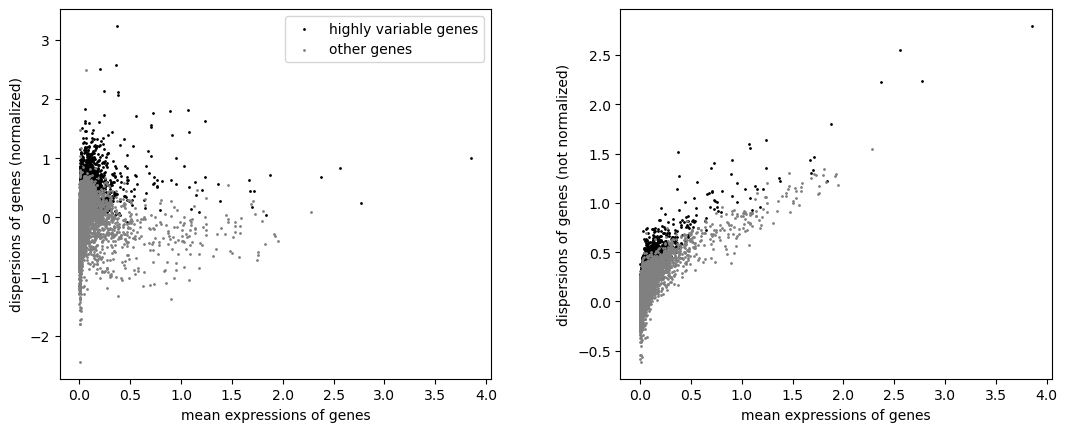

In [27]:
##### Feature Selection ##### ----------------------------------------------------------------------------------------------------
sc.pp.highly_variable_genes(adata, n_top_genes=2000, batch_key="sample", layer = "log1p_norm") # automatically adds columns to adata.var 'highly_variable', 'means', 'dispersions', 'dispersions_norm'. Downstream functions like pca will automatically use only the HVGs if use_highly_variable=True is passed.
sc.pl.highly_variable_genes(adata)

# Mean expression is simply the average expression level of a gene across all cells — how highly expressed it is on average.
# Dispersion is a measure of how much a gene's expression varies across cells, normalized for its mean.

In [29]:
# Save final dataset for integration

adata.write("/rds/general/user/ztb25/home/PBMC_datasets/2/PBMC1_preprocessed.h5ad")